In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# load housing.csv file
df = pd.read_csv('housing.csv')

In [3]:
# show some data (headers), number of values and type of each column
print(df.head())
print(df.info())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639

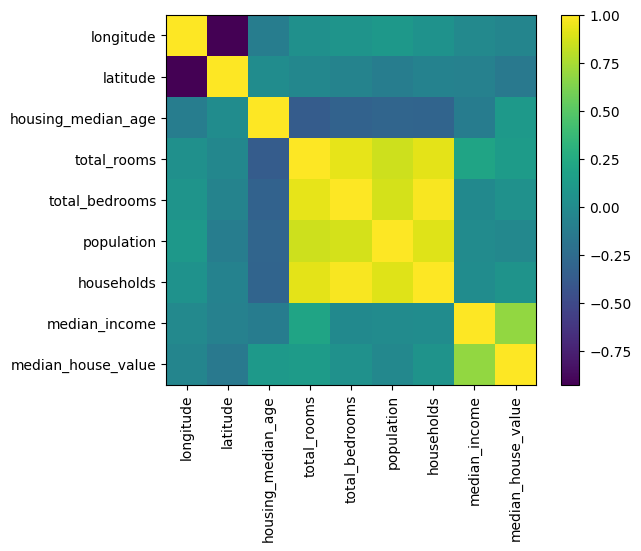

In [4]:

# plot each column relative to the median_house_value

corr = df.corr(numeric_only=True)

#plotting the correlation matrix(add legend for each col and row)
cols = corr.columns
plt.xticks(range(len(cols)), cols, rotation=90)
plt.yticks(range(len(cols)), cols)
#add color legend
plt.colorbar(plt.imshow(corr))
plt.imshow(corr)

In [5]:
# handle non numeric values (ocean_proximity) using one hot encoding
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

# drop rows with missing values
df = df.dropna()

# split data into train and test sets
train_set, test_set = train_test_split(df, test_size=0.3, random_state=42)


In [6]:

# get x and y values for train and test sets
y_train = train_set['median_house_value']
x_train = train_set.drop(['median_house_value'], axis=1)

x_test = test_set.drop(['median_house_value'], axis=1)
y_test = test_set['median_house_value']


In [19]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

# create the pipeline (first scale data then apply logistic regression)
linear_pipe = make_pipeline(MinMaxScaler(), LogisticRegression(max_iter=1000))
# pass data to pipeline (train)
linear_pipe.fit(x_train, y_train)  

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [20]:
decision_tree_pipe = make_pipeline(MinMaxScaler(), DecisionTreeRegressor())
decision_tree_pipe.fit(x_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [21]:
random_forest_pipe = make_pipeline(MinMaxScaler(), RandomForestRegressor())
random_forest_pipe.fit(x_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [22]:
# test the model
score_linear = linear_pipe.score(x_test, y_test)
print("The score for LogisticRegression is: ", score_linear)
score_decision_tree = decision_tree_pipe.score(x_test, y_test)
print("The score for DecisionTreeRegressor is: ", score_decision_tree) 
score_random_forest = random_forest_pipe.score(x_test, y_test)
print("The score for RandomForestRegressor is: ", score_random_forest) 

# with mean squared error
from sklearn.metrics import mean_absolute_error
y_pred_linear = linear_pipe.predict(x_test)
y_pred_decision_tree = decision_tree_pipe.predict(x_test)
y_pred_random_forest = random_forest_pipe.predict(x_test)

mse_linear = mean_absolute_error(y_test, y_pred_linear)
print("The mean squared abs for LogisticRegression is: ", mse_linear)
mse_decision_tree = mean_absolute_error(y_test, y_pred_decision_tree)
print("The mean squared abs for DecisionTreeRegressor is: ", mse_decision_tree)
mse_random_forest = mean_absolute_error(y_test, y_pred_random_forest)
print("The mean squared abs for RandomForestRegressor is: ", mse_random_forest)

The score for LogisticRegression is:  0.048939641109298535
The score for DecisionTreeRegressor is:  0.6633836612564322
The score for RandomForestRegressor is:  0.8216709548968947
The mean squared abs for LogisticRegression is:  156750.94828711255
The mean squared abs for DecisionTreeRegressor is:  42369.21092985318
The mean squared abs for RandomForestRegressor is:  31621.790314845024


In [24]:
# search the best model with GridSearchCV
from sklearn.model_selection import GridSearchCV


models = {
    'linear': linear_pipe,
    'decision_tree': decision_tree_pipe,
    'random_forest': random_forest_pipe
}

params = {
    'linear': {
        'logisticregression__C': [1.0,2.0]
    },
    'decision_tree': {
        'decisiontreeregressor__max_depth': [1,2,3,None]
    },
    'random_forest': {
        'randomforestregressor__n_estimators': [10,100,200]
    }
}

best_models = {}

for model_name, model in models.items():
    print("grid search for",model_name)
    grid = GridSearchCV(model, params[model_name], cv=2)
    grid.fit(x_train, y_train)
    best_models[model_name] = grid.best_estimator_
    print("best params",grid.best_params_)
    print("best score",grid.best_score_)



grid search for linear


c:\Users\hrey2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


best params {'logisticregression__C': 2.0}
best score 0.050548811714824074
grid search for decision_tree
best params {'decisiontreeregressor__max_depth': None}
best score 0.611454618284637
grid search for random_forest
best params {'randomforestregressor__n_estimators': 200}
best score 0.7955002076335278
